In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sensor_1 = pd.read_csv('./1623535615-3006-IAJ9206.csv')
sensor_1.head(), sensor_1.shape

(          x         y         z
 0 -1.003174 -0.097778 -0.017334
 1 -0.993591 -0.084778 -0.009766
 2 -0.964844 -0.048462  0.062012
 3 -0.868591 -0.010437  0.103577
 4 -0.885498 -0.041992  0.078003,
 (4980, 3))

In [3]:
sensor_2 = pd.read_csv('./1624040490-2957-NAI1549.csv')
sensor_2.head(),sensor_2.shape

(          x         y         z
 0  0.029053  0.040283  0.995361
 1  0.034851  0.041809  0.991455
 2  0.043213  0.046143  0.988708
 3  0.042297  0.037048  0.990601
 4  0.050903  0.031860  0.996826,
 (4980, 3))

In [4]:
sensor_3 = pd.read_csv('./1624374799-3006-MYS2071.csv')
sensor_3.head(),sensor_3.shape

(          x         y         z
 0 -0.913757  0.082458 -0.118225
 1 -1.098572  0.048035 -0.115417
 2 -1.151794  0.058899 -0.067078
 3 -1.091187 -0.041626 -0.098022
 4 -1.145691 -0.017517 -0.100891,
 (4980, 3))

In [5]:
sensor_4 = pd.read_csv('./1624962426-3006-NAH4736.csv')
sensor_4.head(),sensor_4.shape

(          x         y         z
 0  0.056030 -0.132202  1.070740
 1  0.012695 -0.122559  1.105103
 2 -0.034119 -0.059143  1.287842
 3 -0.099854 -0.018066  1.352234
 4 -0.147156 -0.015686  1.086365,
 (4980, 3))

In [293]:
random_signal = pd.DataFrame()

In [297]:
random_signal['x'] = np.random.normal(loc = sensor_1['x'].mean(), scale = sensor_1['x'].std(), size = sensor_1['x'].shape[0])
random_signal['y'] = np.random.normal(loc = sensor_1['y'].mean(), scale = sensor_1['y'].std(), size = sensor_1['y'].shape[0])
random_signal['z'] = np.random.normal(loc = sensor_1['z'].mean(), scale = sensor_1['z'].std(), size = sensor_1['z'].shape[0])

In [153]:
# in seconds
samp_time_1 = 3.006
samp_time_2 = 2.957
samp_time_3 = 3.006
samp_time_4 = 3.006

# in Hz
samp_freq_1 = sensor_1.shape[0]/samp_time_1
samp_freq_2 = sensor_2.shape[0]/samp_time_2
samp_freq_3 = sensor_3.shape[0]/samp_time_3
samp_freq_4 = sensor_4.shape[0]/samp_time_4


In [159]:
sensor_1_x = np.linspace(start=0, stop=samp_time_1, num = sensor_1.shape[0])
sensor_2_x = np.linspace(start=0, stop=samp_time_2, num = sensor_2.shape[0])
sensor_3_x = np.linspace(start=0, stop=samp_time_3, num = sensor_3.shape[0])
sensor_4_x = np.linspace(start=0, stop=samp_time_4, num = sensor_4.shape[0])

## Gráficos no tempo

In [158]:
def plot_time(sensor_x, sensor_y):
    fig, ax = plt.subplots(3, 1, figsize=(15, 6))


    ax[0].plot(sensor_x, sensor_y['x'], label='x')
    ax[1].plot(sensor_x, sensor_y['y'], label='y')
    ax[2].plot(sensor_x, sensor_y['z'], label='z')

    ax[0].set_ylabel('x')
    ax[1].set_ylabel('y')
    ax[2].set_ylabel('z')
    plt.xlabel('Tempo')

#     ax[0].legend()
#     ax[1].legend()
#     ax[2].legend()

    plt.show()

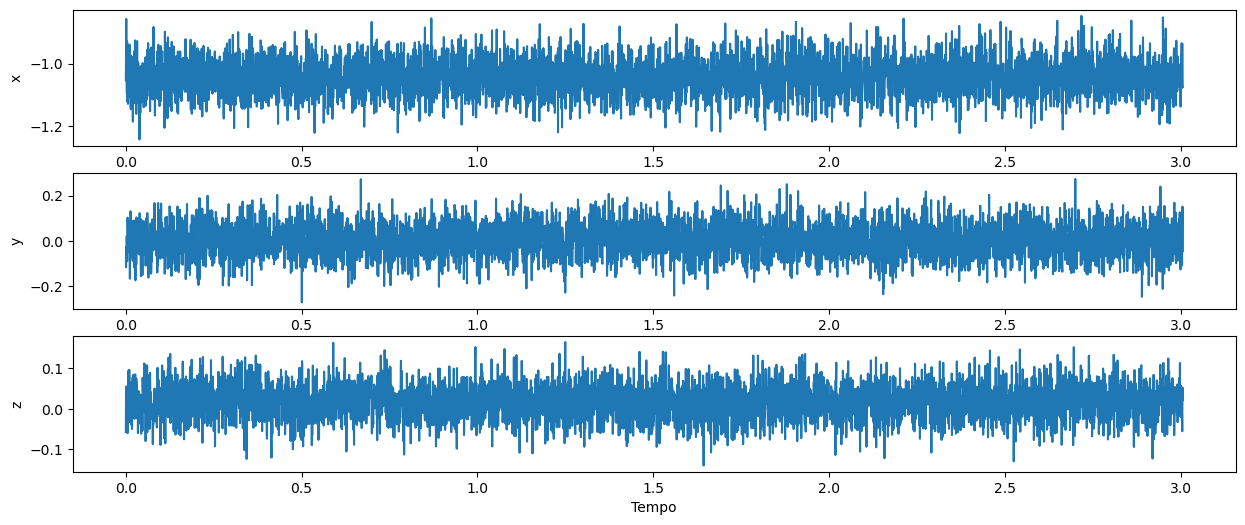

In [319]:
plot_time(sensor_x=sensor_1_x, sensor_y=random_signal)

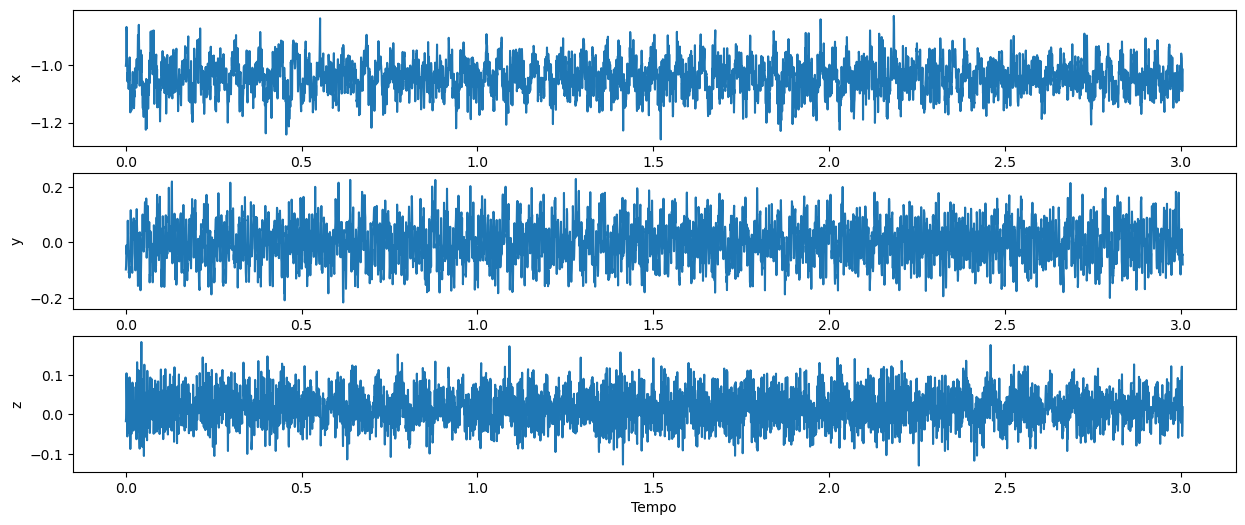

In [160]:
plot_time(sensor_x=sensor_1_x, sensor_y=sensor_1)

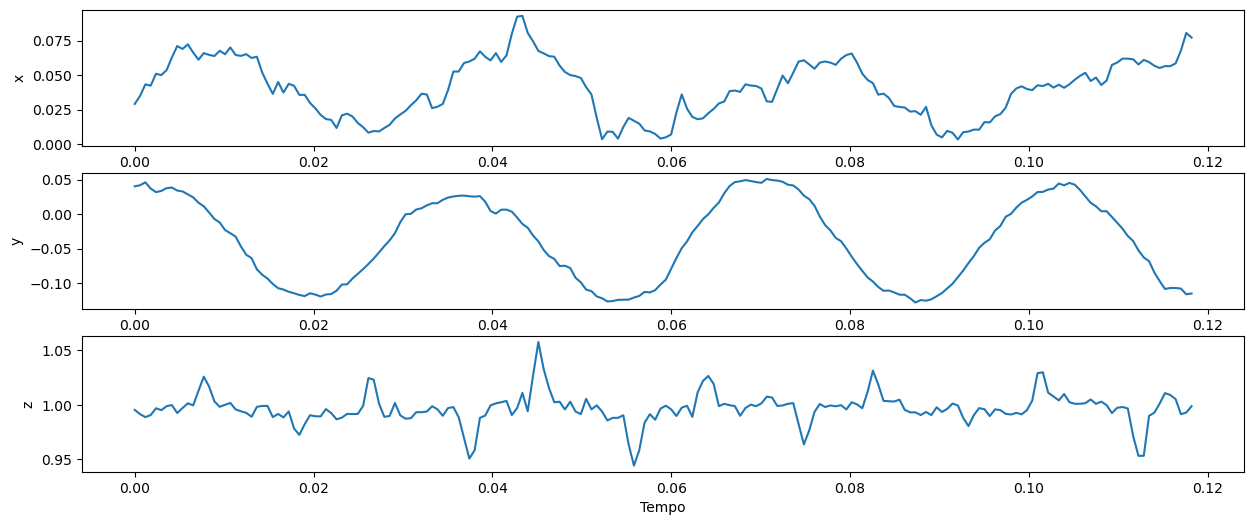

In [161]:
plot_time(sensor_x=sensor_2_x[0:200], sensor_y=sensor_2.iloc[0:200, :])

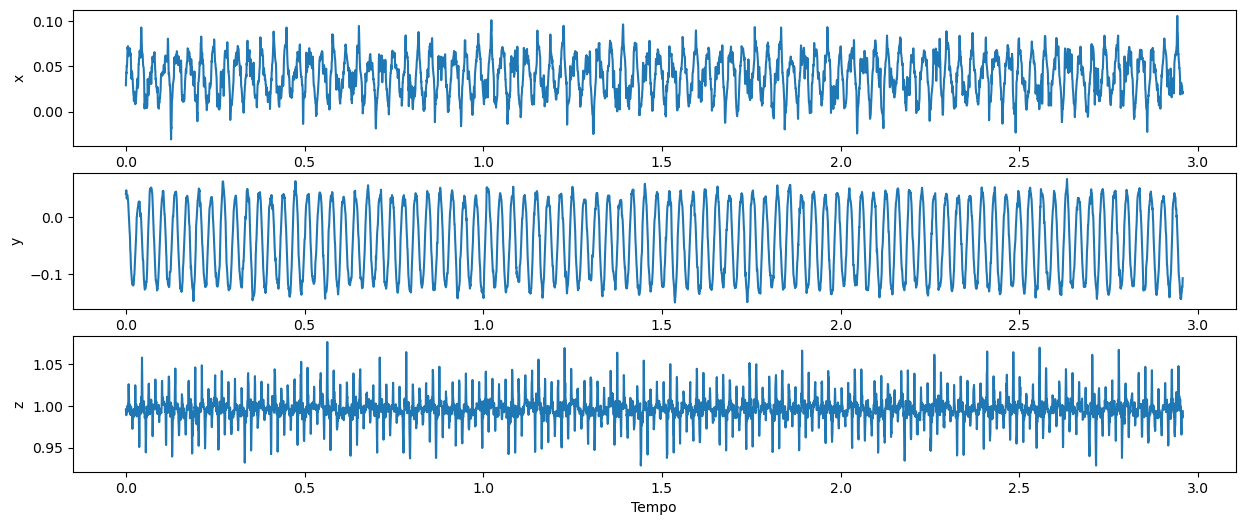

In [162]:
plot_time(sensor_x=sensor_2_x, sensor_y=sensor_2)

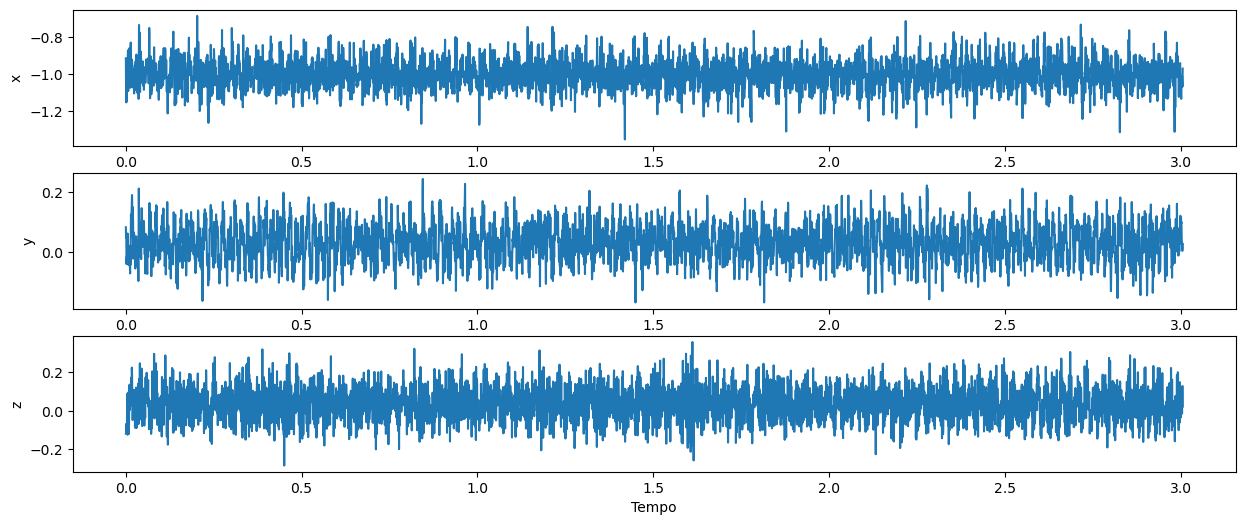

In [163]:
plot_time(sensor_x=sensor_3_x, sensor_y=sensor_3)

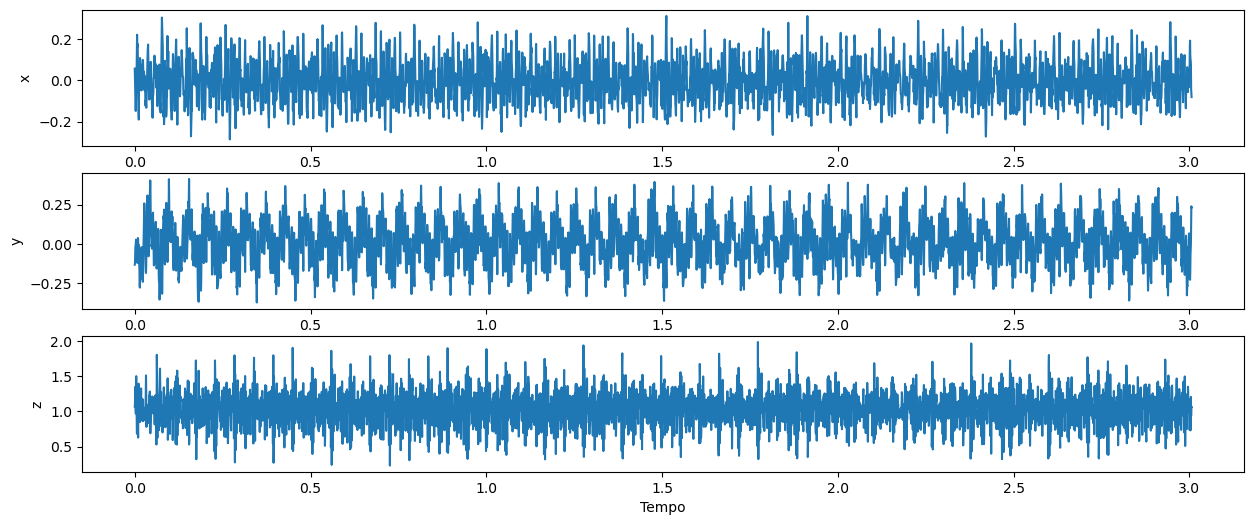

In [164]:
plot_time(sensor_x=sensor_4_x, sensor_y=sensor_4)

## Gráficos no domínio da frequência

In [191]:
def get_fft(sensor, samp_freq, around_zero = True):
    colunas = ['x', 'y', 'z']
    n_pontos = len(sensor) 
    frequencias = np.fft.fftfreq(n_pontos, 1 / samp_freq)

    fft_resultados = {}
    for coluna in colunas:
        if around_zero:
            sinal = sensor[coluna] - sensor[coluna].mean()
        else:
            sinal = sensor[coluna]
            
        fft_resultado = np.fft.fft(sinal)

        frequencias_positivas = frequencias[:n_pontos // 2]
        fft_resultado_positivo = fft_resultado[:n_pontos // 2]

        fft_resultados[coluna] = fft_resultado_positivo
    
    return frequencias_positivas, fft_resultados

In [195]:
frequencias_positivas, fft_resultados = get_fft(sensor_1,samp_freq_1)

<AxesSubplot:ylabel='Count'>

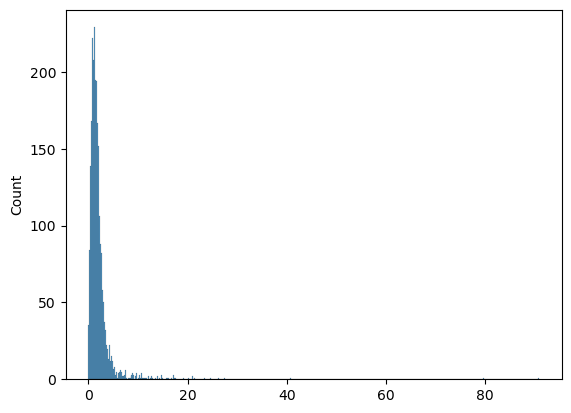

In [198]:
sns.histplot(abs(fft_resultados['x']))

In [286]:
def plot_frequency(sensor, samp_freq, around_zero = True):
    
    
    colunas = ['x', 'y', 'z']
    
    frequencias_positivas, fft_resultados = get_fft(sensor, samp_freq, around_zero = around_zero)
    
    fig, axs = plt.subplots(3, 1, figsize=(10, 6))
    axs = axs.ravel()

    for i, coluna in enumerate(colunas):
        
#         quantile = np.quantile(a = abs(fft_resultados[coluna]), q = 0.995)
#         filtered_column = [i if i >= quantile else 0 for i in abs(fft_resultados[coluna])]
        
        axs[i].plot(frequencias_positivas, np.abs(fft_resultados[coluna]))
#         axs[i].plot(frequencias_positivas, filtered_column)
        axs[i].set_title(f'FFT em {coluna}')
        axs[i].set_xlabel('Frequência (Hz)')
        axs[i].set_ylabel('Amplitude')

    plt.tight_layout()
    plt.show()


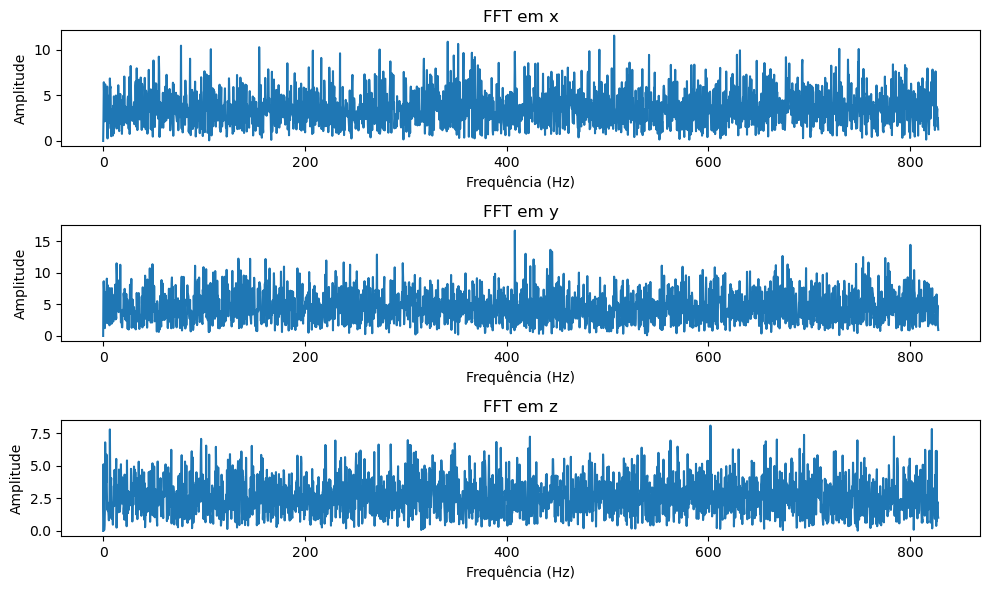

In [320]:
plot_frequency(random_signal,samp_freq_1)

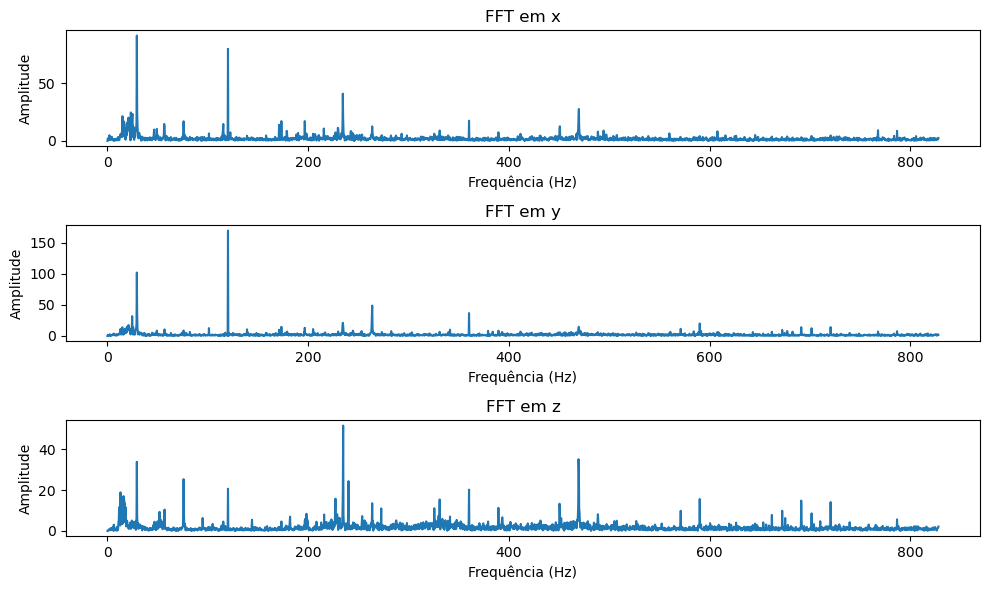

In [287]:
plot_frequency(sensor_1,samp_freq_1)

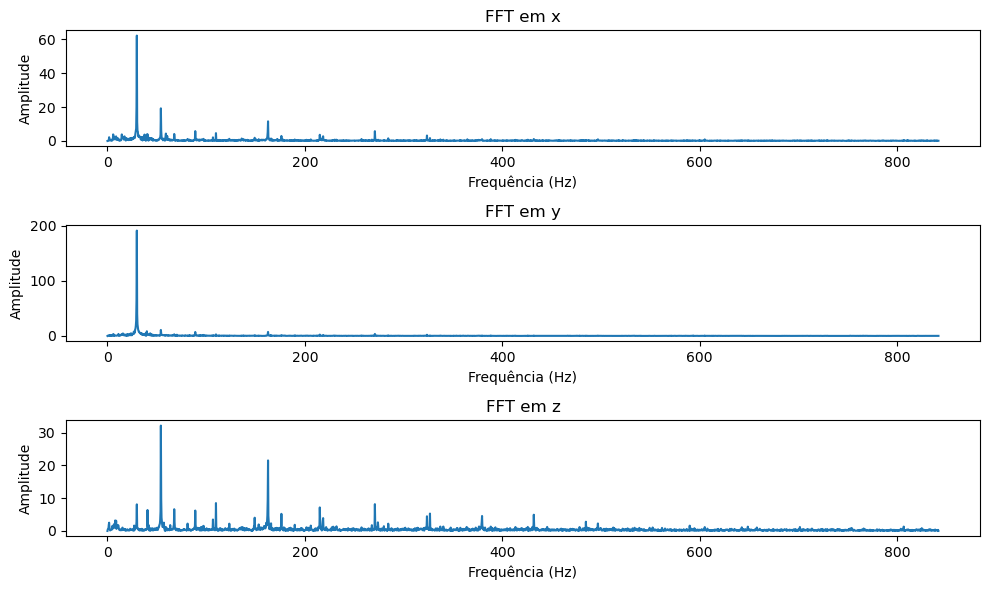

In [288]:
plot_frequency(sensor_2,samp_freq_2)

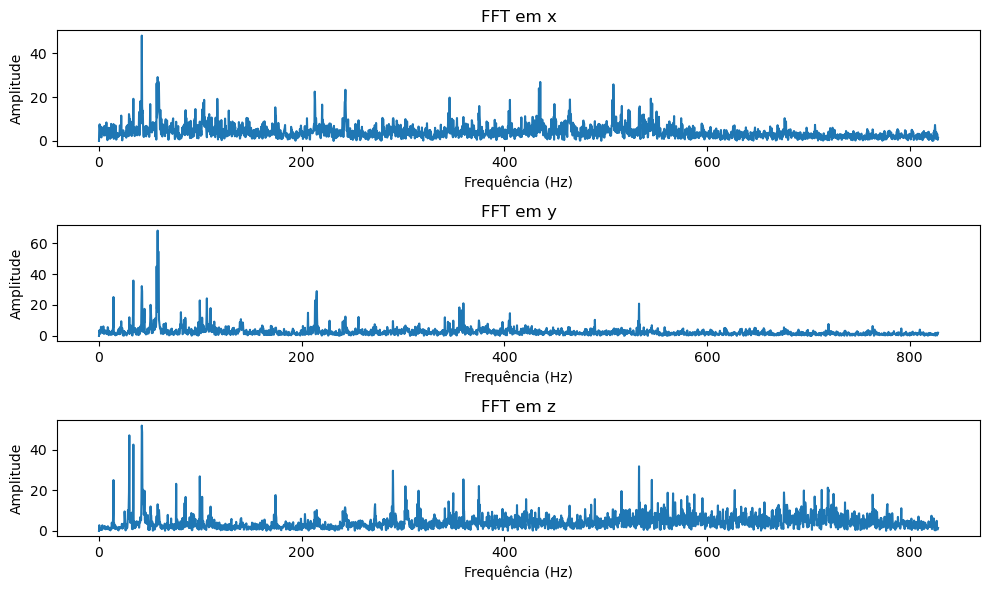

In [289]:
plot_frequency(sensor_3,samp_freq_3)

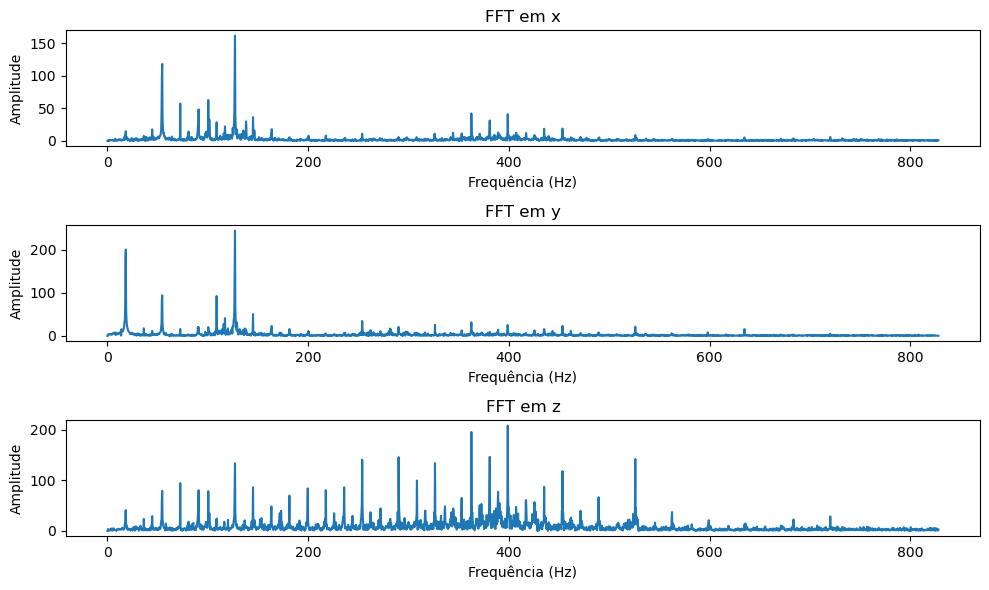

In [290]:
plot_frequency(sensor_4,samp_freq_4)

## Filtro

In [189]:
from scipy.signal import find_peaks

In [249]:
# def filtro_maior_amplitude(sensor, samp_freq, around_zero = True):
    
#     colunas = ['x', 'y', 'z']
#     frequencias_positivas, fft_resultados = get_fft(sensor, samp_freq, around_zero = around_zero)
    
#     filtered_columns = {}
#     filtered_results = {}
    
#     for coluna in colunas:
#         quantile = np.quantile(a = abs(fft_resultados[coluna]), q = 0.995)
#         filtered_columns[coluna] = [1 if i >= quantile else 0 for i in abs(fft_resultados[coluna])]
#         filtered_results[coluna] = filtered_columns[coluna]*fft_resultados[coluna]
        
#     return filtered_results
        

# teste = filtro_maior_amplitude(sensor = sensor_1, samp_freq = samp_freq_1, around_zero = True)

In [310]:
# def filtro_maior_amplitude(sinal, samp_freq, q = 0.999):

#     n_pontos = len(sinal)
#     frequencias = np.fft.fftfreq(n_pontos, 1 / samp_freq)
#     fft_resultado = np.fft.fft(sinal)
    
#     quantile = np.quantile(a = abs(fft_resultados[coluna]), q = q)


#     filtro = [1 if i >= quantile else 0 for i in abs(fft_resultado)]

#     fft_filtrada = fft_resultado * filtro

#     sinal_filtrado = np.fft.ifft(fft_filtrada)

#     return sinal_filtrado.real

In [314]:
def filtro_maior_amplitude(sinal, samp_freq, num_picos=5):

    n_pontos = len(sinal)
    frequencias = np.fft.fftfreq(n_pontos, 1 / samp_freq)
    fft_resultado = np.fft.fft(sinal)
    


    picos, _ = find_peaks(np.abs(fft_resultado), height=None, distance=None)

    picos_ordenados = sorted(picos, key=lambda x: np.abs(fft_resultado[x]), reverse=True)

    filtro = np.zeros(n_pontos)
    for pico in picos_ordenados[:num_picos]:
        filtro[pico] = 1

    fft_filtrada = fft_resultado * filtro

    sinal_filtrado = np.fft.ifft(fft_filtrada)

    return sinal_filtrado.real

In [329]:
def plot_filtro(sensor, samp_freq, around_zero = True, number_of_records = None):
    
    
    colunas = ['x', 'y', 'z']
    n_pontos = len(sensor)
    frequencias = np.fft.fftfreq(n_pontos, 1 / samp_freq)


    fft_resultados = {}
    sinais_filtrados = {}
    for coluna in colunas:
        if around_zero:
            sinal = sensor[coluna] - sensor[coluna].mean()
        else:
            sinal = sensor[coluna]
        sinal_filtrado = filtro_maior_amplitude(sinal, samp_freq, num_picos=5)
        
        fft_resultado = np.fft.fft(sinal_filtrado)


        frequencias_positivas = frequencias[:n_pontos // 2]
        fft_resultado_positivo = fft_resultado[:n_pontos // 2]

        fft_resultados[coluna] = fft_resultado_positivo
        sinais_filtrados[coluna] = sinal_filtrado

#     frequencias_positivas, fft_resultados = get_fft(sensor, samp_freq, around_zero = around_zero)


    fig, axs = plt.subplots(3, 2, figsize=(12, 10))

    for i, coluna in enumerate(colunas):
        
        if number_of_records == None:

            axs[i, 0].plot(sensor.index, sensor[coluna], label=f'{coluna} original')
            axs[i, 0].plot(sensor.index, sinais_filtrados[coluna] + sensor[coluna].mean(), label=f'{coluna} filtrado', linewidth=2)
        
        else:
            axs[i, 0].plot(sensor.index[0: number_of_records], sensor[coluna][0: number_of_records], label=f'{coluna} original')
            axs[i, 0].plot(sensor.index[0: number_of_records], (sinais_filtrados[coluna] + sensor[coluna].mean())[0: number_of_records], label=f'{coluna} filtrado', linewidth=2)
        
            
        
        axs[i, 0].set_title(f'Sinal em {coluna}')
        axs[i, 0].set_xlabel('Tempo')
        axs[i, 0].set_ylabel('Amplitude')
        axs[i, 0].legend()


        axs[i, 1].plot(frequencias_positivas, np.abs(fft_resultados[coluna]))
        axs[i, 1].set_title(f'FFT em {coluna}')
        axs[i, 1].set_xlabel('Frequência (Hz)')
        axs[i, 1].set_ylabel('Amplitude')

    plt.tight_layout()
    plt.show()


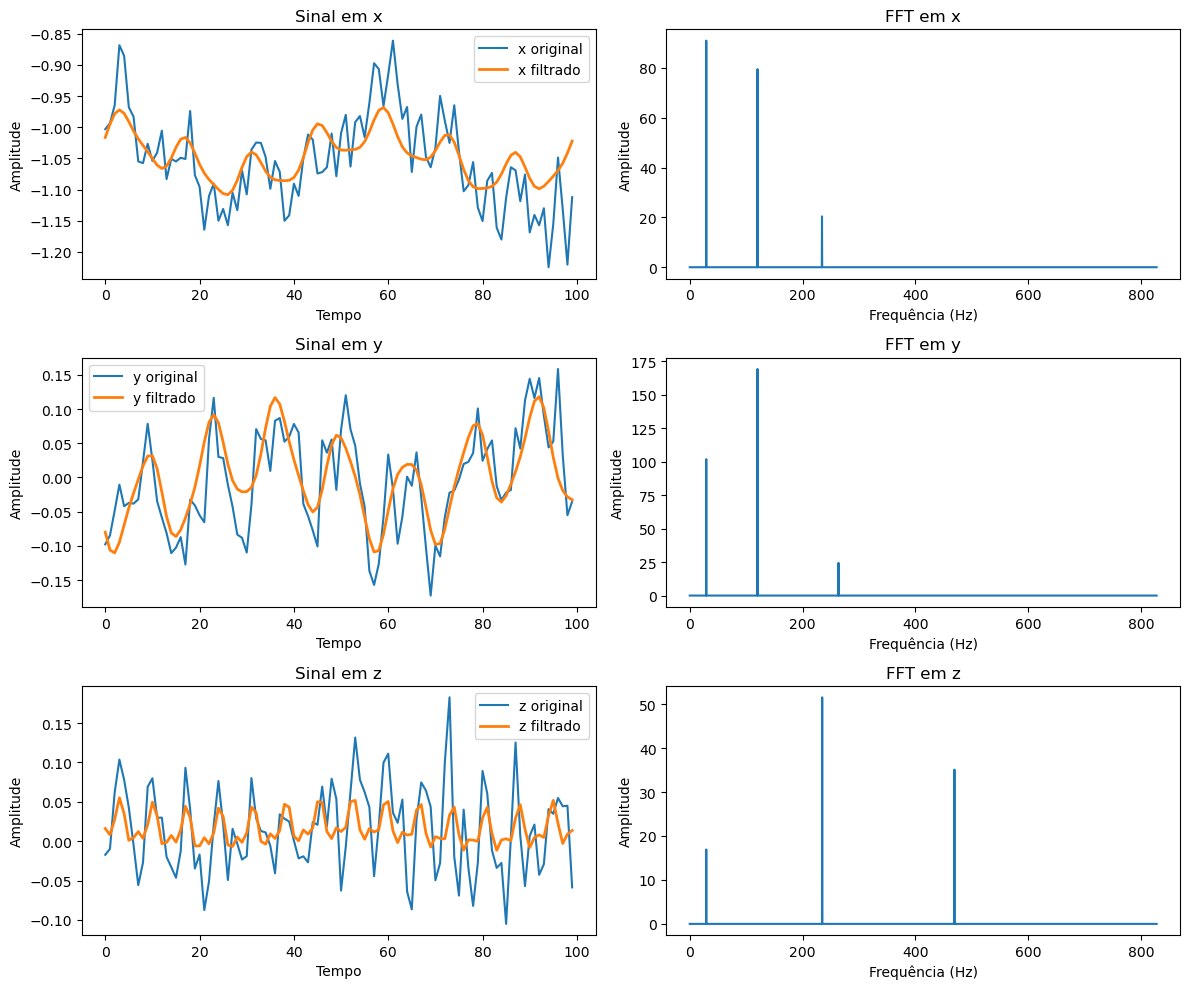

In [333]:
plot_filtro(sensor_1,samp_freq_1, number_of_records=100)

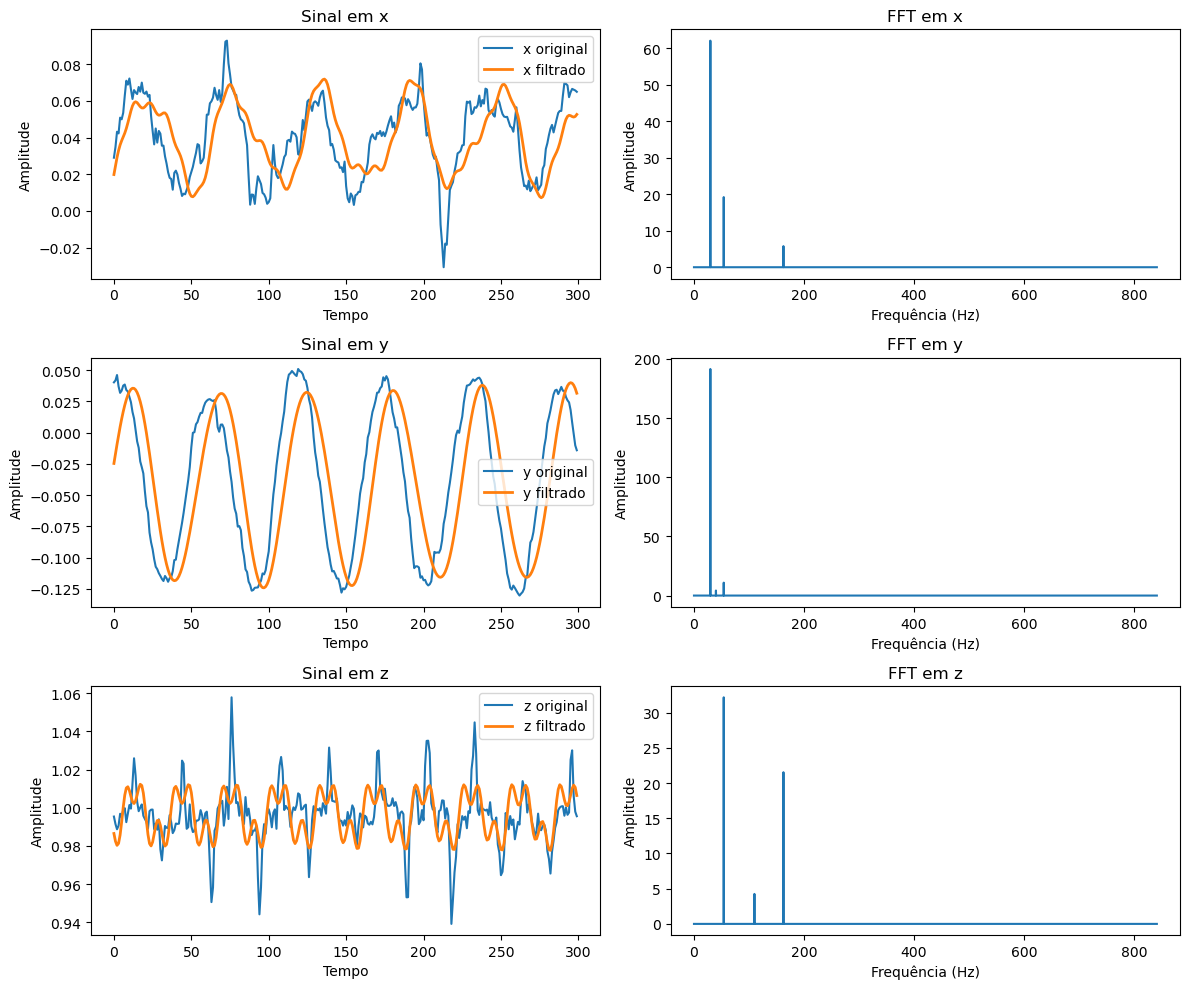

In [334]:
plot_filtro(sensor_2,samp_freq_2, number_of_records=300)

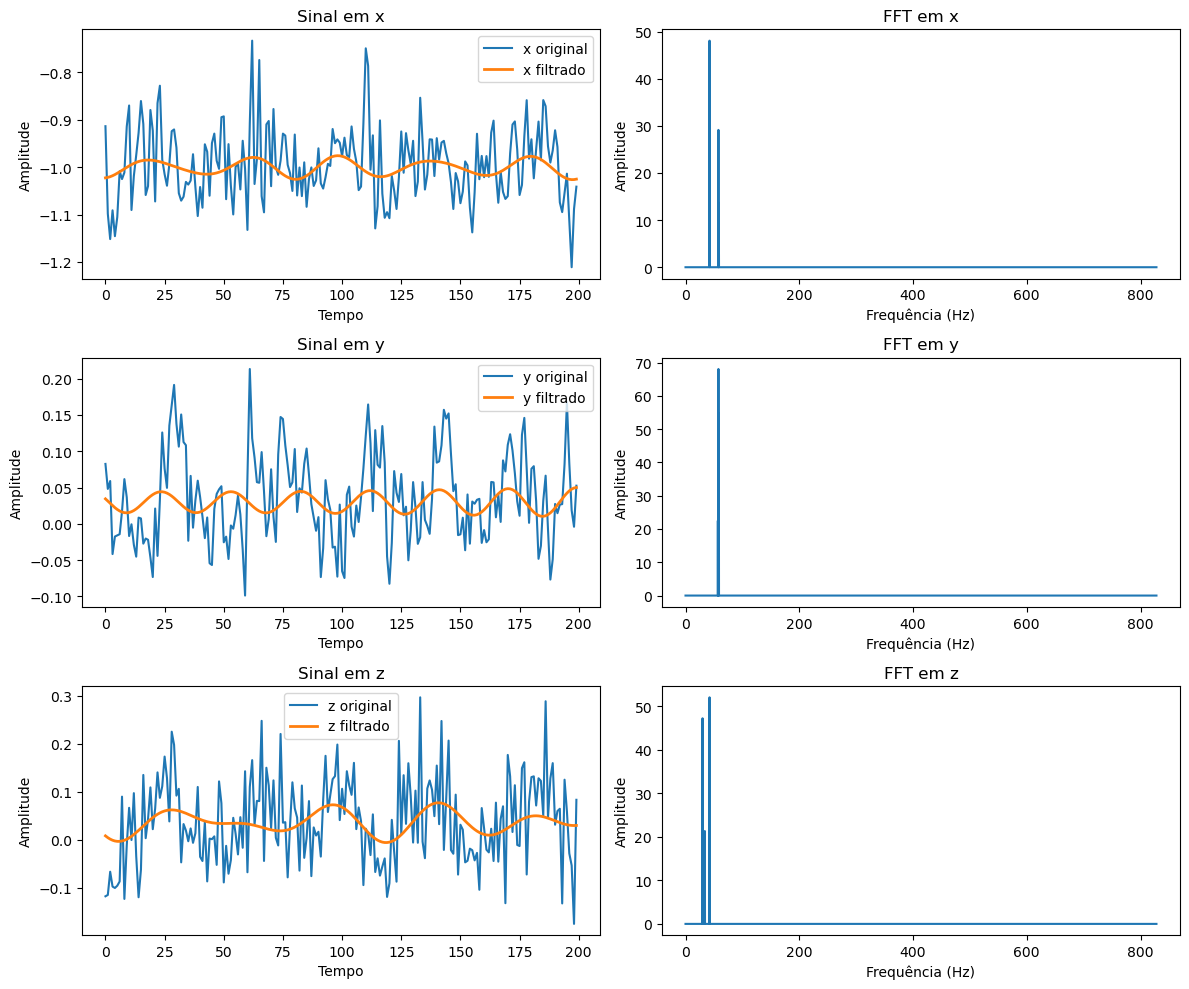

In [335]:
plot_filtro(sensor_3,samp_freq_3, number_of_records=200)

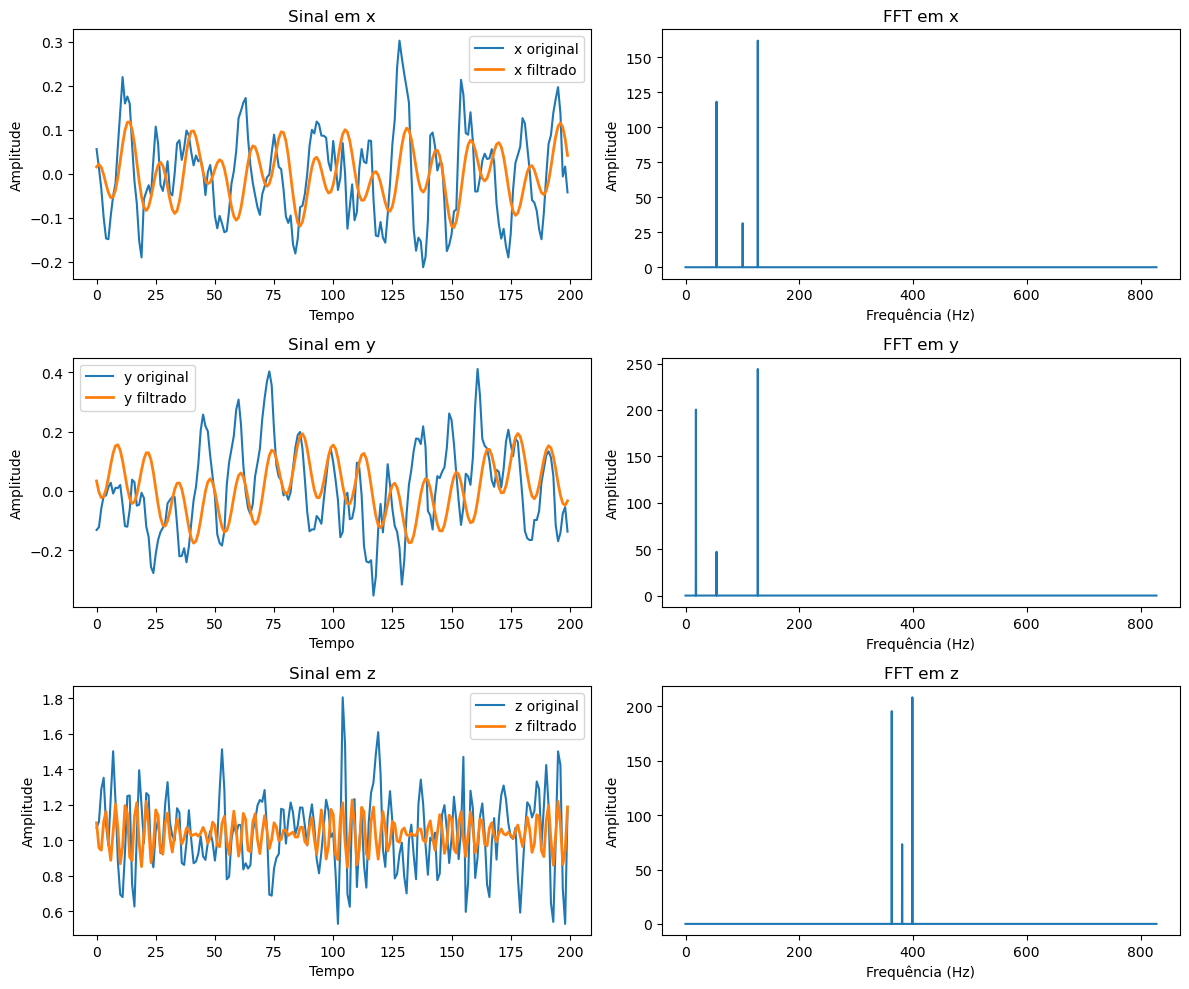

In [336]:
plot_filtro(sensor_4,samp_freq_3, number_of_records=200)